In [64]:
! pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 220 kB 4.0 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp35-cp35m-linux_x86_64.whl size=332531 sha256=30978dc4d7c97ff279f3562f6a220e4afc3cb7e6d2db0ef9f53cfe93cf2a5bab
  Stored in directory: /home/santiago/.cache/pip/wheels/8f/43/df/c613b639b8dede283fdf55de4b3c3034592df008727db55d83
Successfully built wordcloud
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [68]:
! pip install nltk

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.4 MB 2.0 MB/s eta 0:00:01
     |████████████████████████████████| 694 kB 2.1 MB/s eta 0:00:01
  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434678 sha256=00f3ed748c67da5b2a1f21ced1ab55560ab92efb14c68d2a3cc45d9a9de341c2
  Stored in directory: /home/santiago/.cache/pip/wheels/5f/ad/20/8be5325bab3791cc067f49a12929479ed9a8347ff732cac59d
  Created wheel for regex: filename=regex-2020.11.13-cp35-cp35m-linux_x86_64.whl size=577985 sha256=7cabcebc7df8284ece11f810fe40f2b54a7fa3d1835cf3a51ed249bb4b77593f
  Stored in directory: /home/santiago/.cache/pip/wheels/a7/2e/82/c105385ef65d2c37b9a8e0fb9bb81b4e18ed297d8ea2b102f1
Successfully built nltk regex
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [71]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [79]:
import requests 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Getting data 

In [2]:
token='LWL05x51mHOMT9GtOqnHHgqWzc72'
r=requests.get('http://159.65.217.53:3001/brandbuzz/segusimiento/Pruebatecnica/'+token)

In [3]:
r_json=r.json()
data=pd.DataFrame.from_dict(r_json)

In [4]:
data.head()

,ARTICLE_ID,ARTICLE_URL,AUTHOR,Accion,Brand,CONTENT,Campañas,Country,DURATION_FIRST_TO_LAST,DURATION_PUBLISHED_TO_FIRST,...,final_pasion,final_sentimiento,final_sobre_que,gender_detection,id_compound,plataforma,post_link,respuesta_sugerida,service_model,user
0,1106967077742,http://www.facebook.com/permalink.php?story_fb...,JORGE ARTURO GARCIA RAGUA,No Gestionado,POKER,😂😂😂😂,USUARIO,CO,,,...,None,None,None,None,1106967077742COPOKER113723718687309_2872362423...,None,None,None,None,dafca
1,1106967077743,http://www.facebook.com/permalink.php?story_fb...,MIGUEL GALLEGO,No Gestionado,POKER,Oe,USUARIO,CO,,,...,None,None,None,None,1106967077743COPOKER113723718687309_2872362423...,None,None,None,None,dafca
2,1106967077745,http://www.facebook.com/permalink.php?story_fb...,ROSSELY SALCEDO OJEDA,No Gestionado,POKER,Hasan,USUARIO,CO,,,...,None,None,None,None,1106967077745COPOKER113723718687309_2872362423...,None,None,None,None,dafca
3,1106967077746,http://www.facebook.com/permalink.php?story_fb...,DIAN ARAKUE,No Gestionado,POKER,,USUARIO,CO,,,...,None,None,None,None,1106967077746COPOKER113723718687309_2872362423...,None,None,None,None,dafca
4,1106967077747,http://www.facebook.com/permalink.php?story_fb...,CAMILA GAMBOA,No Gestionado,POKER,Cony Gonzalez,USUARIO,CO,,,...,None,None,None,None,1106967077747COPOKER113723718687309_2872362423...,None,None,None,None,dafca


# Understanding data

How much data is there?

In [5]:
num_rows,num_cols=data.shape
print('Number of rows {}  , number of columns {}'.format(num_rows,num_cols))

Number of rows 1000  , number of columns 62


In [6]:
columns_names=list(data.columns)
columns_names

['ARTICLE_ID',
 'ARTICLE_URL',
 'AUTHOR',
 'Accion',
 'Brand',
 'CONTENT',
 'Campañas',
 'Country',
 'DURATION_FIRST_TO_LAST',
 'DURATION_PUBLISHED_TO_FIRST',
 'Direcionamiento',
 'EXTERNAL_AUTHOR_ID',
 'EXTERNAL_ID',
 'FIRST_ASSIGNMENT_DATE',
 'FIRST_ENGAGEMENT_ACTIVITY',
 'FileType',
 'First',
 'HARVESTED_DATE',
 'HASHTAG_MENTIONED',
 'HEADLINE',
 'Keeper_Filtra',
 'Keeper_Responding',
 'LAST_ENGAGEMENT_ACTIVITY',
 'MEDIA_PROVIDER',
 'POST_TYPE',
 'PUBLISH_DATE',
 'Project Care',
 'SENTIMENT',
 'SOURCE',
 'Tipo',
 'Tpo_Filtra',
 'Tpo_Resp',
 'Tpo_Rta',
 'USERNAME_MENTIONED',
 'WORKFLOW_ASSIGNMENT',
 'WORKFLOW_AUTHORNOTES',
 'WORKFLOW_AUTHORTAGS',
 'WORKFLOW_BLOGNOTES',
 'WORKFLOW_BLOGPOSTNOTES',
 'WORKFLOW_BLOGPOSTTAGS',
 'WORKFLOW_BLOGTAGS',
 'WORKFLOW_CLASSIFICATION',
 'WORKFLOW_ENGAGEMENT',
 'WORKFLOW_PRIORITY',
 'categoria',
 'cola_respuestas',
 'data_processing_status',
 'direction',
 'fecha',
 'final_intencion',
 'final_ocasion',
 'final_oportunidad',
 'final_pasion',
 'final_s

In [7]:
data.iloc[100]

ARTICLE_ID                                                         1106967077983
ARTICLE_URL                    http://www.facebook.com/permalink.php?story_fb...
AUTHOR                                                  LUISA FERNANDA CASTAÑEDA
Accion                                                             No Gestionado
Brand                                                                      POKER
CONTENT                                                       Cristian Castañeda
Campañas                                                                 USUARIO
Country                                                                       CO
DURATION_FIRST_TO_LAST                                                          
DURATION_PUBLISHED_TO_FIRST                                                     
Direcionamiento                                                                 
EXTERNAL_AUTHOR_ID                                              2275325192529235
EXTERNAL_ID                 

Cleaning data

In [8]:
#country
countries=pd.unique(data['Country'])
print('Countries on data {}'.format(countries))
actions=pd.unique(data['Accion'])
print('Actions on data {}'.format(actions))
campaings=pd.unique(data['Campañas'])
print('Campaings on data {}'.format(campaings))
brands=pd.unique(data['Brand'])
print('Brands on data {}'.format(brands))
P_Care=pd.unique(data['Project Care'])
print('Project care on data {}'.format(P_Care))
fi=pd.unique(data['final_intencion'])
print('Final objective on data {}'.format(fi))
sentiments= pd.unique(data['SENTIMENT'])
print('Final objective on data {}'.format(sentiments))
final_ocasion= pd.unique(data['final_ocasion'])
print('Final ocasion on data {}'.format(final_ocasion))
workflow_classification= pd.unique(data['WORKFLOW_CLASSIFICATION'])
print('Workflow classification ocasion on data {}'.format(workflow_classification))
media_provider= pd.unique(data['MEDIA_PROVIDER'])
print('Media provider on data {}'.format(media_provider))


Countries on data ['CO']
Actions on data ['No Gestionado' 'Tipifica' 'Responde']
Campaings on data ['USUARIO' 'MANO A MANO' 'AON' 'MAMREVANCHA' 'MANO A MANO REVANCHA' None
 'POKER ROJA 2']
Brands on data ['POKER']
Project care on data [None '']
Final objective on data [None]
Final objective on data ['Neutral' 'Positive' 'Negative']
Final ocasion on data [None]
Workflow classification ocasion on data ['']
Media provider on data ['Facebook Comments' 'Facebook Unpublished Comments' 'TWITTER'
 'Facebook Unpublished Video Posts' 'Facebook Replies'
 'YouTube Social Account Replies' 'YouTube Social Account Comments'
 'Facebook Page Incoming Inbox Messages' 'Facebook Unpublished Replies']


In [9]:
data.columns = map(str.upper, data.columns)
data_resume=data[['ARTICLE_ID','CONTENT','CAMPAÑAS','SENTIMENT','MEDIA_PROVIDER','PUBLISH_DATE']]

In [10]:
data_resume.head()

,ARTICLE_ID,CONTENT,CAMPAÑAS,SENTIMENT,MEDIA_PROVIDER,PUBLISH_DATE
0,1106967077742,😂😂😂😂,USUARIO,Neutral,Facebook Comments,2020-07-27T00:36:06.000Z
1,1106967077743,Oe,USUARIO,Neutral,Facebook Comments,2020-07-26T23:57:32.000Z
2,1106967077745,Hasan,USUARIO,Neutral,Facebook Comments,2020-07-27T00:27:40.000Z
3,1106967077746,,USUARIO,Neutral,Facebook Comments,2020-07-27T00:24:20.000Z
4,1106967077747,Cony Gonzalez,USUARIO,Neutral,Facebook Comments,2020-07-27T00:02:27.000Z


# Analizying data

How manny interactions per campaign are there?

Before I found there are three campaings on the data (USUARIO,MANO A MANO REVANCHA,POKER ROJA 2). So It is important to split the data into these three campaings and count each comment or replie. 

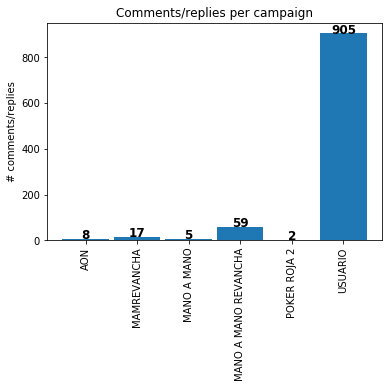

In [16]:
count_per_campaign=data_resume.set_index(["CAMPAÑAS","ARTICLE_ID"]).count(level="CAMPAÑAS")['CONTENT']
labels=count_per_campaign.keys()
values=count_per_campaign.values

fig, ax = plt.subplots()
ax.bar(labels, values,orientation ='vertical', width= 0.9,)
ax.set_ylabel('# comments/replies')
ax.set_title('Comments/replies per campaign')
for index, value in enumerate(values):
    plt.text(index, value, str(value),ha='center',fontsize='large',fontweight='bold')
plt.xticks(rotation=90)
plt.savefig('Comments_replies per campaign')

In [12]:
count_per_campaign.values

array([  8,  17,   5,  59,   2, 905])

In [13]:
pd.unique(data['MEDIA_PROVIDER'])


array(['Facebook Comments', 'Facebook Unpublished Comments', 'TWITTER',
       'Facebook Unpublished Video Posts', 'Facebook Replies',
       'YouTube Social Account Replies',
       'YouTube Social Account Comments',
       'Facebook Page Incoming Inbox Messages',
       'Facebook Unpublished Replies'], dtype=object)

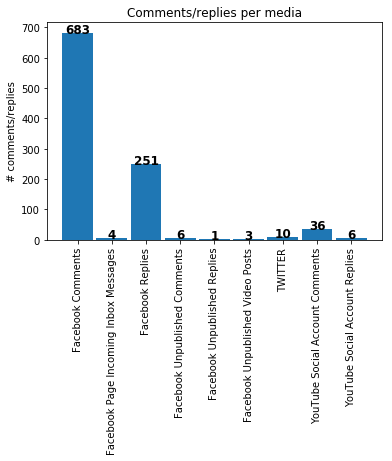

In [14]:
count_per_media=data_resume.set_index(['MEDIA_PROVIDER',"ARTICLE_ID"]).count(level='MEDIA_PROVIDER')['CONTENT']
labels=count_per_media.keys()
values=count_per_media.values

fig, ax = plt.subplots()
ax.bar(labels, values,orientation ='vertical', width= 0.9,)
ax.set_ylabel('# comments/replies')
ax.set_title('Comments/replies per media')
for index, value in enumerate(values):
    plt.text(index, value, str(value),ha='center',fontsize='large',fontweight='bold')
plt.xticks(rotation=90)
plt.savefig('Comments_replies per media')

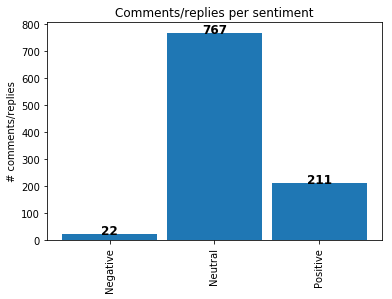

In [36]:
count_per_media=data_resume.set_index(['SENTIMENT',"ARTICLE_ID"]).count(level='SENTIMENT')['CONTENT']
labels=count_per_media.keys()
values=count_per_media.values

fig, ax = plt.subplots()
ax.bar(labels, values,orientation ='vertical', width= 0.9,)
ax.set_ylabel('# comments/replies')
ax.set_title('Comments/replies per sentiment')
for index, value in enumerate(values):
    plt.text(index, value, str(value),ha='center',fontsize='large',fontweight='bold')
plt.xticks(rotation=90)
plt.savefig('Comments_replies per sentiment')

It is possible to make a deeper analysis on the comments and replies focused on different categories in this case I will segment the data into the biggest two campaignes. 

### Segmented on campaings

In [25]:
campaign_user=data_resume[data_resume['CAMPAÑAS']=='USUARIO'].copy() #getting the data of USUARIO campaign
campaign_mano=data_resume[data_resume['CAMPAÑAS']=='MANO A MANO REVANCHA'].copy()

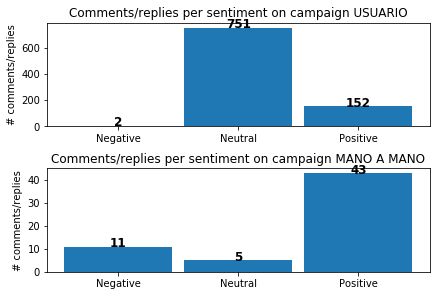

In [47]:
usuario_sentiments=campaign_user.set_index(['SENTIMENT',"ARTICLE_ID"]).count(level='SENTIMENT')['CONTENT']
labels_U=usuario_sentiments.keys()
values_U=usuario_sentiments.values


mano_sentiments=campaign_mano.set_index(['SENTIMENT',"ARTICLE_ID"]).count(level='SENTIMENT')['CONTENT']
labels_m=mano_sentiments.keys()
values_m=mano_sentiments.values

fig, axs =plt.subplots(2,1,constrained_layout=True)
axs[0].bar(labels_U, values_U,orientation ='vertical', width= 0.9,)
axs[0].set_ylabel('# comments/replies')
axs[0].set_title('Comments/replies per sentiment on campaign USUARIO')
for index, value in enumerate(values_U):
    axs[0].text(index, value, str(value),ha='center',fontsize='large',fontweight='bold')
#axs[0].xticks(rotation=90)


axs[1].bar(labels_m, values_m,orientation ='vertical', width= 0.9,)
axs[1].set_ylabel('# comments/replies')
axs[1].set_title('Comments/replies per sentiment on campaign MANO A MANO')
for index, value in enumerate(values_m):
    axs[1].text(index, value, str(value),ha='center',fontsize='large',fontweight='bold')
#axs[1].xticks(rotation=90)
plt.savefig('Comments_replies per sentiment campaigns')

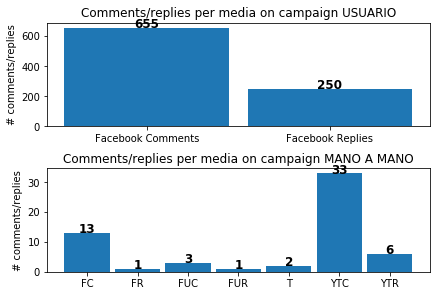

In [61]:
usuario_mp=campaign_user.set_index(['MEDIA_PROVIDER',"ARTICLE_ID"]).count(level='MEDIA_PROVIDER')['CONTENT']
mano_mp=campaign_mano.set_index(['MEDIA_PROVIDER',"ARTICLE_ID"]).count(level='MEDIA_PROVIDER')['CONTENT']
labels_m=mano_mp.keys()
values_m=mano_mp.values
labels_U=usuario_mp.keys()
values_U=usuario_mp.values

fig, axs =plt.subplots(2,1,constrained_layout=True)
axs[0].bar(labels_U, values_U,orientation ='vertical', width= 0.9,)
axs[0].set_ylabel('# comments/replies')
axs[0].set_title('Comments/replies per media on campaign USUARIO')
for index, value in enumerate(values_U):
    axs[0].text(index, value, str(value),ha='center',fontsize='large',fontweight='bold')
#axs[0].xticks(rotation=90)

#plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=90)
axs[1].bar(['FC','FR','FUC','FUR','T','YTC','YTR'], values_m,orientation ='vertical', width= 0.9,)
axs[1].set_ylabel('# comments/replies')
axs[1].set_title('Comments/replies per media on campaign MANO A MANO')
for index, value in enumerate(values_m):
    axs[1].text(index, value, str(value),ha='center',fontsize='large',fontweight='bold')
#axs[1].xticks(rotation=90)
plt.savefig('Comments_replies per media on campings')

## Analyzing content

### Wordcloud

In [74]:
text = " ".join(Content for Content in data_resume.CONTENT)
print("Hay  {} palabras en los comentarios y respuestas".format(len(text)))

Hay  38530 palabras en los comentarios y respuestas


In [84]:
from nltk.corpus import stopwords
stopwords=stopwords.words('spanish')
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
wordcloud.to_file('NubePalabras.png')

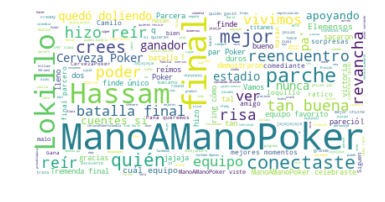

In [85]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### Campaign 

Campaign Mano a Mano

In [95]:
text_mano = " ".join(Content for Content in campaign_mano.CONTENT)

In [91]:
stopwords_mod=['Mano a mano','Poker','Cerveza','ManoAManoPoker']
for word in stopwords_mod:
    stopwords.append(word)

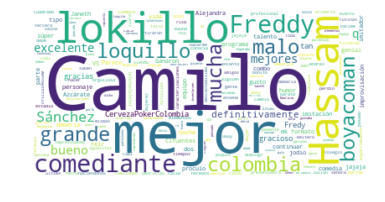

In [96]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_mano)
wordcloud.to_file('NubePalabras_CampaignManoAMano.png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Campaign Usuario

In [97]:
text_user = " ".join(Content for Content in campaign_user.CONTENT)

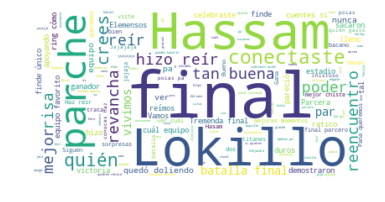

In [99]:
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text_user)
wordcloud.to_file('NubePalabras_CampaignUsuario.png')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()